# Neurônios e camadas

Neste código nós iremos explorar o funcionamento interno dos neurônios (que são as unidades elementares das redes neurais) e das camadas.

Especificamente, este código fará paralelos com modelos que você já aprendeu em aulas anteriores: o modelo de regressão linear e o modelo de regressão logística.

O código faz isso por meio da ferramenta denominada TensorFlow, que consiste num ambiente bastante utilizado hoje no contexto de Aprendizado de Máquina.

## Pacotes

**Tensorflow e Keras**  
Tensorflow é um pacote de machine learning desenvolvido pela Google. Em 2019, a Google integrou Keras ao Tensorflow e lançou o Tensorflow 2.0. Keras é um ambiente desenvolvido independentemente por François Chollet.

Caso você esteja utilizando Google Colab, provavelmente o TensorFlow já encontra-se instalado no servidor que rodará o seu código. Portanto, os comandos abaixo serão reconhecidos automaticamente.

Por outro lado, caso você esteja utilizando o localhost do Jupyter, talvez você terá que instalar o TensorFlow no seu Ambiente Anaconda. Para fazer isso:
- Veja o seguinte tutorial https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
- Caso não tenha funcionado para você a opção acima, pesquise no google algum outro tutorial usando os seguintes termos de busca: ``how to install tensorflow in anaconda''
- Depois de instalar, feche e abra o Jupyter novamente
- Caso não tenha funcionado para você a opção acima, tente instalar o tensorflow usando um outro ambiente de programação em Python. Por exemplo, abra o Spyder e rode o seguinte comando: pip install tensorflow
- Caso nada disso funcione em seu computador, considere utilizar o Google Colab

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Neurônio sem ativação - Modelo de Regressão Linear


### Conjunto de dados

Nesse contexto de regressão linear, usaremos o exemplo abaixo.

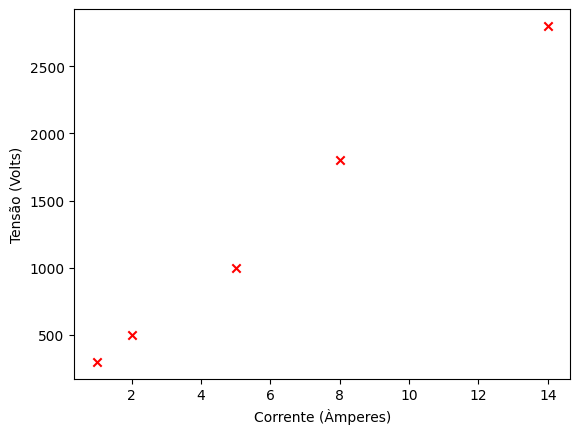

In [50]:
X_train = np.array([[1.0], [2.0], [5.0], [8.0], [14.0],], dtype=np.float32)
Y_train = np.array([[300.0], [500.0], [1000.0], [1800.0], [2800.0],], dtype=np.float32)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Amostras")
ax.set_ylabel('Tensão (Volts)')
ax.set_xlabel('Corrente (Àmperes)')
plt.show()

### Modelo de Regressão Linear

Dizemos que um neurônio não possui ativação quando ele implementa uma regressão linear simples do tipo:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$



Podemos definir uma camada com um único neurônio (uma única unidade) e comparar seu funcionamento com aquele apresentado pela função de regressão linear que já aprendemos.

In [51]:
camada_linear = tf.keras.layers.Dense(units=1, activation = 'linear', ) # Dense é o tipo de camada de rede neural que nós aprendemos até agora

Vamos examinar os pesos presentes nessa camada:

In [52]:
camada_linear.get_weights()

[]

Não há pesos nessa camada uma vez que eles ainda não foram inicializados (instanciados). Vamos calcular a saída do modelo (chamada aqui de `a1`) para um exemplo presente em `X_train`. Isso fará com que os pesos sejam inicializados com valores aleatórios pequenos automaticamente. Note que a entrada para a camada precisa ser 2-D (por isso estamos fazendo o reshape).

In [53]:
print(X_train[0])

a1 = camada_linear(X_train[0].reshape(1,1))
print(a1)

[1.]
tf.Tensor([[-0.7800539]], shape=(1, 1), dtype=float32)


O resultado é um tensor (apenas um outro nome para `array`) com shape (1,1). Ou seja, note que a entrada `X_train[0]=1` entrou na nossa camada e gerou uma saída `a1`.
Conforme já mencionado, os pesos do modelo são inicializados automaticamente como valores aleatórios pequenos. O valor padrão para a inicialização dos termos independentes do tipo $b$ é zero.

In [54]:
w,b = camada_linear.get_weights()
print(f"w = {w}, b={b}")

w = [[-0.7800539]], b=[0.]


Observe que um modelo de regressão linear com uma única característica de entrada produz um único peso $w$ e um único valor independente $b$.

Vamos agora alterar os valores dos pesos (que foram inializados automaticamente) para alguns valores conhecidos:

In [55]:
set_w = np.array([[200]])
set_b = np.array([100])

# a função set_weights recebe na sua entrada uma lista de arrays numpy
camada_linear.set_weights([set_w, set_b])
print(camada_linear.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Vamos comparar agora a equação (1) com a saída da nossa camada.

In [56]:
a1 = camada_linear(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


Elas produzem os mesmos valores! Isso mostra que estamos de fato implementado o modelo de regressão linear desejado.

Vamos agora usar nossa camada linear para fazer previsões com base nos nossos dados de treinamento.

In [57]:
previsao_tensorflow = camada_linear(X_train)
previsao_numpy      = np.dot( X_train, set_w) + set_b

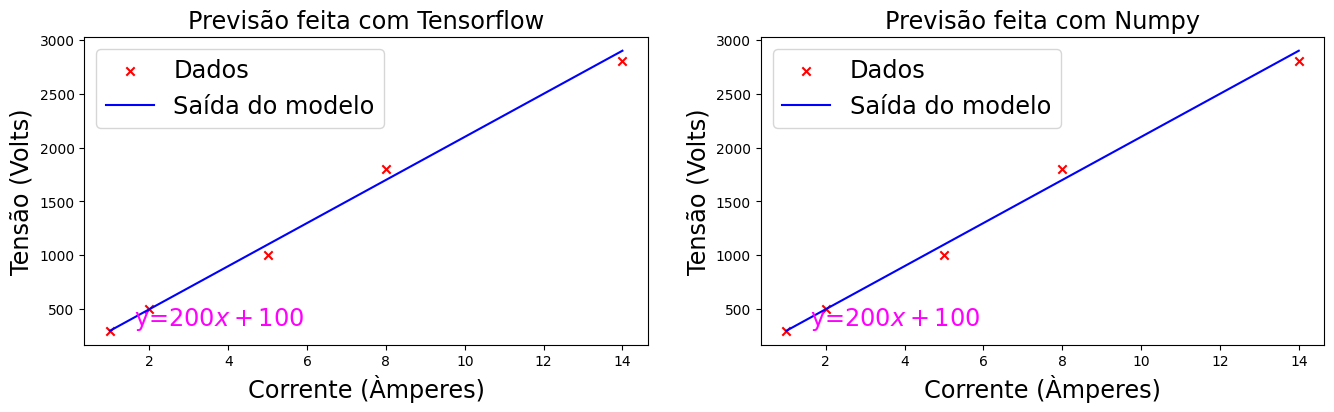

In [58]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Dados")
ax[0].plot(X_train, previsao_tensorflow,  c='blue', label="Saída do modelo")
ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='magenta')
ax[0].legend(fontsize='xx-large')
ax[0].set_ylabel('Tensão (Volts)', fontsize='xx-large')
ax[0].set_xlabel('Corrente (Àmperes)', fontsize='xx-large')
ax[0].set_title("Previsão feita com Tensorflow",fontsize='xx-large')

ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Dados")
ax[1].plot(X_train, previsao_numpy,  c='blue', label="Saída do modelo")
ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='magenta')
ax[1].legend(fontsize='xx-large')
ax[1].set_ylabel('Tensão (Volts)', fontsize='xx-large')
ax[1].set_xlabel('Corrente (Àmperes)', fontsize='xx-large')
ax[1].set_title("Previsão feita com Numpy",fontsize='xx-large')
plt.show()

## Neurônio com ativação sigmoide - Modelo de Regressão Logística

A função implementada por um/a neurônio/unidade com ativação sigmoide consiste no nosso modelo de regressão logística já aprendido:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
onde $$g(x) = sigmoid(x)$$

Vamos definir $w$ e $b$ para valores conhecidos para checar o modelo.


### Conjunto de dados

In [133]:
X_train = np.array([0., 1, 2, 3, 4, 5, 1.5, 3.5, 4.5], dtype=np.float32).reshape(-1,1)  # Matriz 2-D
Y_train = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=np.float32).reshape(-1,1)  # Matriz 2-D

In [134]:
# Adicionando novas amostras manualmente por interpolação (sem ruído)
# Exemplo de interpolação entre as amostras de X = 1 e X = 2
X_new = np.array([[1.5], [3.5]], dtype=np.float32)  # Novas amostras
Y_new = np.array([[0], [1]], dtype=np.float32)  # Novos rótulos

# Combinar os dados antigos com as novas amostras
X_train_augmented = np.vstack([X_train, X_new])
Y_train_augmented = np.vstack([Y_train, Y_new])

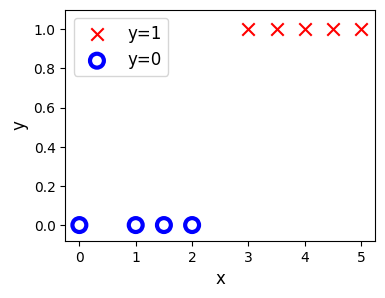

In [135]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors="blue",lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.legend(fontsize=12)
plt.show()

### Neurônio Logístico (sigmoide)

Nós podemos implementar um 'neurônio logístico' adicionando uma ativação sigmoide. Esse neurônio então estará implemetando a equação (2) acima.

Essa seção irá criar um Modelo Tensorflow que contém nossa camada logística para demonstrar um método alternativo para criar modelos. O Tensorflow é mais frequentemente usado para criar modelos com múltiplas camadas. O modelo sequencial [Sequential](https://keras.io/guides/sequential_model/) é uma forma conveniente de construir esses modelos.

In [136]:
modelo = Sequential( # Sequencial é o comando que podemos usar para criar uma rede neural com múltiplas camadas usando apenas um comando. Nesse caso, nossa rede possui apenas uma camada
    [
        tf.keras.layers.Dense(units=1, input_dim=1,  activation = 'sigmoid', name='L1') # Dense é o tipo de camada de rede neural que nós aprendemos até agora
    ]
)

A função `model.summary()` mostra um resumo do modelo (camadas e o número de parâmetros do modelo):
- Há apenas uma camada nesse modelo
- Essa camada possui apenas uma unidade
- Essa unidade possui dois parâmetros, $w$ e $b$.

In [137]:
modelo.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [138]:
camada_logistica = modelo.get_layer('L1')
w,b = camada_logistica.get_weights()
print(w,b)
print(w.shape,b.shape)

[[1.5734872]] [0.]
(1, 1) (1,)


Note o parâmetro $w$ foi inicializado com um valor aleatório pequeno e $b$ foi inicializado em zero.

Vamos definir valores desejados para esses dois parâmetros

In [139]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# a função set_weights recebe na sua entrada uma lista de arrays numpy
camada_logistica.set_weights([set_w, set_b])
print(camada_logistica.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


Vamos comparar a equação (2) com a saída da camada.

In [140]:
a1 = modelo.predict(X_train[0].reshape(1,1))
print(a1)
z    = np.dot(set_w,X_train[0].reshape(1,1)) + set_b;
alog = 1.0/(1.0+np.exp(-z))
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.01098694]]
[[0.01098694]]


Elas produzem os mesmos valores! (aprox. 0.01)

Agora, nós podemos usar nossa camada logística e o modelo Numpy para fazer previsões com base nos dados de treinamento.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


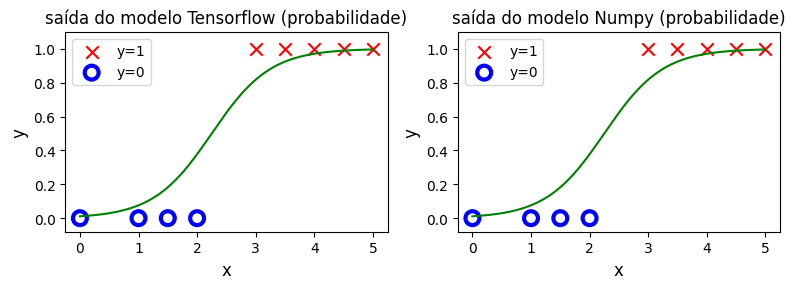

In [141]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
ax[0].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

# calculando a saída do modelo tensorflow
x = np.arange(0,5,0.01)
f = modelo.predict(x.reshape(-1,1))
ax[0].plot(x, f.reshape(-1,), c = 'green')

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('saída do modelo Tensorflow (probabilidade)')
ax[0].legend()



ax[1].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[1].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

# calculando a saída do modelo numpy
x = np.arange(0,5,0.01)
z = set_w*x + set_b
f = 1.0/(1.0+np.exp(-z))
ax[1].plot(x, f.reshape(-1,), c = 'green')

ax[1].set_ylim(-0.08,1.1)
ax[1].set_ylabel('y', fontsize=12)
ax[1].set_xlabel('x', fontsize=12)
ax[1].set_title('saída do modelo Numpy (probabilidade)')
ax[1].legend()


plt.tight_layout()
plt.show()

# Parabéns!

Você construiu uma rede neural bastante simples e explorou as similaridades de um neurônio tanto no contexto da regressão linear como também no contexto da regressão lógistica.